In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def load_worm_data(filepath):
    try:
        df = pd.read_csv(filepath)
        # Check if GlobalFrame exists, if not use index or create it
        if "GlobalFrame" in df.columns:
            df = df.set_index("GlobalFrame")
        
        # Ensure Timestamp exists for coloring
        if 'Timestamp' in df.columns:
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
            df['Timestamp_s'] = df['Timestamp'].astype(np.int64) // 10**9
            df['relative_time'] = df['Timestamp_s'] - df['Timestamp_s'].min()
        else:
            # Fallback if Timestamp is missing
            df['relative_time'] = np.arange(len(df))
            
        return df
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

def plot_traj(ax, df, title):
    if df is None:
        return
    sc = ax.scatter(df['X'], df['Y'], c=df['relative_time'], cmap='plasma', s=5, alpha=0.6)
    ax.plot(df['X'], df['Y'], "--", color='lightgray', linewidth=0.7, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.axis('equal')
    return sc

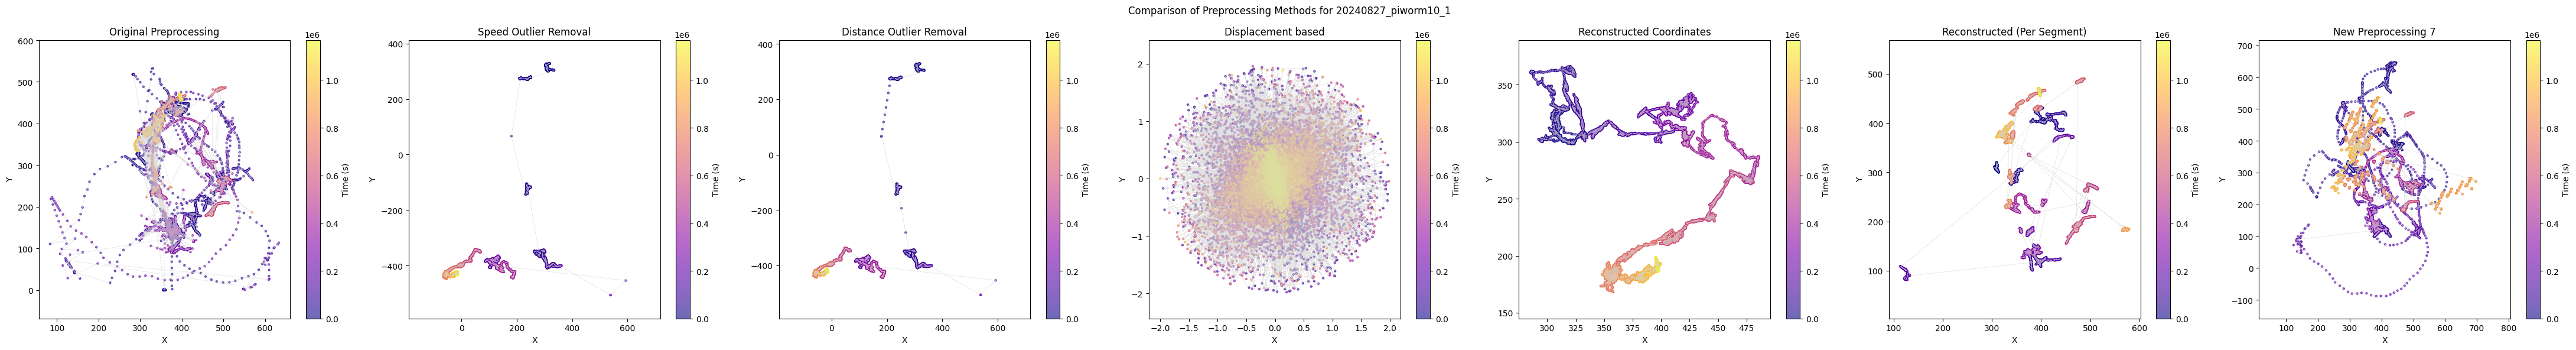

In [39]:
file1 = "../preprocessed_data/TERBINAFINE- (control)/20240827_piworm10_1.csv"
file2 = "../preprocessed_data2/TERBINAFINE- (control)/20240827_piworm10_1.csv"
file3 = "../preprocessed_data3/TERBINAFINE- (control)/20240827_piworm10_1.csv"
file4 = "../preprocessed_data4/TERBINAFINE- (control)/20240827_piworm10_1.csv"
file5 = "../preprocessed_data5/TERBINAFINE- (control)/20240827_piworm10_1.csv"
file6 = "../preprocessed_data6/TERBINAFINE- (control)/20240827_piworm10_1.csv"
file7 = "../preprocessed_data7/TERBINAFINE- (control)/20240827_piworm10_1.csv"

df1 = load_worm_data(file1)
df2 = load_worm_data(file2)
df3 = load_worm_data(file3)
df4 = load_worm_data(file4)
df5 = load_worm_data(file5)
df6 = load_worm_data(file6)
df7 = load_worm_data(file7)

fig, axes = plt.subplots(1, 7, figsize=(44, 6))

if df1 is not None:
    sc1 = plot_traj(axes[0], df1, "Original Preprocessing")
    plt.colorbar(sc1, ax=axes[0], label='Time (s)')

if df2 is not None:
    sc2 = plot_traj(axes[1], df2, "Speed Outlier Removal")
    plt.colorbar(sc2, ax=axes[1], label='Time (s)')

if df3 is not None:
    sc3 = plot_traj(axes[2], df3, "Distance Outlier Removal")
    plt.colorbar(sc3, ax=axes[2], label='Time (s)')

if df4 is not None:
    sc4 = plot_traj(axes[3], df4, "Displacement based")
    plt.colorbar(sc4, ax=axes[3], label='Time (s)')

if df5 is not None:
    sc5 = plot_traj(axes[4], df5, "Reconstructed Coordinates")
    plt.colorbar(sc5, ax=axes[4], label='Time (s)')

if df6 is not None:
    sc6 = plot_traj(axes[5], df6, "Reconstructed (Per Segment)")
    plt.colorbar(sc6, ax=axes[5], label='Time (s)')

if df7 is not None:
    sc7 = plot_traj(axes[6], df7, "New Preprocessing 7")
    plt.colorbar(sc7, ax=axes[6], label='Time (s)')

plt.suptitle("Comparison of Preprocessing Methods for 20240827_piworm10_1")
plt.tight_layout()
plt.show()

In [40]:
print(f"Original preprocessing (df1): {len(df1)} rows")
print(f"New preprocessing (df2): {len(df2)} rows")
print(f"New preprocessing 3 (df3): {len(df3)} rows")
print(f"New preprocessing 4 (df4): {len(df4)} rows")
print(f"New preprocessing 5 (df5): {len(df5)} rows")
print(f"New preprocessing 6 (df6): {len(df6)} rows")
print(f"New preprocessing 7 (df7): {len(df7)} rows")
print(f"Difference (1 vs 2): {len(df1) - len(df2)} rows removed ({(len(df1) - len(df2)) / len(df1) * 100:.2f}%)")
print(f"Difference (1 vs 3): {len(df1) - len(df3)} rows removed ({(len(df1) - len(df3)) / len(df1) * 100:.2f}%)")
print(f"Difference (1 vs 4): {len(df1) - len(df4)} rows removed ({(len(df1) - len(df4)) / len(df1) * 100:.2f}%)")
print(f"Difference (1 vs 5): {len(df1) - len(df5)} rows removed ({(len(df1) - len(df5)) / len(df1) * 100:.2f}%)")
print(f"Difference (1 vs 6): {len(df1) - len(df6)} rows removed ({(len(df1) - len(df6)) / len(df1) * 100:.2f}%)")
print(f"Difference (1 vs 7): {len(df1) - len(df7)} rows removed ({(len(df1) - len(df7)) / len(df1) * 100:.2f}%)")

Original preprocessing (df1): 48811 rows
New preprocessing (df2): 41438 rows
New preprocessing 3 (df3): 41465 rows
New preprocessing 4 (df4): 41450 rows
New preprocessing 5 (df5): 41451 rows
New preprocessing 6 (df6): 41493 rows
New preprocessing 7 (df7): 43947 rows
Difference (1 vs 2): 7373 rows removed (15.11%)
Difference (1 vs 3): 7346 rows removed (15.05%)
Difference (1 vs 4): 7361 rows removed (15.08%)
Difference (1 vs 5): 7360 rows removed (15.08%)
Difference (1 vs 6): 7318 rows removed (14.99%)
Difference (1 vs 7): 4864 rows removed (9.96%)


In [41]:
def frame_distances_stats(df, label):
    # Calculate Euclidean distances between consecutive frames
    dx = df['X'].diff()
    dy = df['Y'].diff()
    distances = np.sqrt(dx**2 + dy**2).dropna()
    print(f"{label}:")
    print(f"  Mean distance: {distances.mean():.3f}")
    print(f"  Median distance: {distances.median():.3f}")
    print(f"  Std distance: {distances.std():.3f}")
    print(f"  Min distance: {distances.min():.3f}")
    print(f"  Max distance: {distances.max():.3f}")
    print(f"  99th percentile: {np.percentile(distances, 99):.3f}")
    print(f"  Number of frames: {len(distances)}")
    print()

frame_distances_stats(df1, "Original preprocessing (df1)")
frame_distances_stats(df2, "New preprocessing (df2)")
frame_distances_stats(df3, "New preprocessing 3 (df3)")
frame_distances_stats(df4, "New preprocessing 4 (df4)")
frame_distances_stats(df5, "New preprocessing 5 (df5)")
frame_distances_stats(df6, "New preprocessing 6 (df6)")
frame_distances_stats(df7, "New preprocessing 7 (df7)")

Original preprocessing (df1):
  Mean distance: 5.872
  Median distance: 0.295
  Std distance: 18.904
  Min distance: 0.000
  Max distance: 446.578
  99th percentile: 101.987
  Number of frames: 48810

New preprocessing (df2):
  Mean distance: 0.394
  Median distance: 0.230
  Std distance: 3.418
  Min distance: 0.000
  Max distance: 485.501
  99th percentile: 1.726
  Number of frames: 41437

New preprocessing 3 (df3):
  Mean distance: 0.394
  Median distance: 0.231
  Std distance: 3.037
  Min distance: 0.000
  Max distance: 485.501
  99th percentile: 1.733
  Number of frames: 41464

New preprocessing 4 (df4):
  Mean distance: 0.439
  Median distance: 0.296
  Std distance: 0.445
  Min distance: 0.000
  Max distance: 3.828
  99th percentile: 2.098
  Number of frames: 41449

New preprocessing 5 (df5):
  Mean distance: 0.352
  Median distance: 0.230
  Std distance: 0.365
  Min distance: 0.000
  Max distance: 2.000
  99th percentile: 1.721
  Number of frames: 41450

New preprocessing 6 (df6)

In [42]:
# Calculate distances for each dataframe
dx1 = df1['X'].diff()
dy1 = df1['Y'].diff()
distances1 = np.sqrt(dx1**2 + dy1**2)

dx2 = df2['X'].diff()
dy2 = df2['Y'].diff()
distances2 = np.sqrt(dx2**2 + dy2**2)

dx3 = df3['X'].diff()
dy3 = df3['Y'].diff()
distances3 = np.sqrt(dx3**2 + dy3**2)

dx4 = df4['X'].diff()
dy4 = df4['Y'].diff()
distances4 = np.sqrt(dx4**2 + dy4**2)

dx5 = df5['X'].diff()
dy5 = df5['Y'].diff()
distances5 = np.sqrt(dx5**2 + dy5**2)

dx6 = df6['X'].diff()
dy6 = df6['Y'].diff()
distances6 = np.sqrt(dx6**2 + dy6**2)

dx7 = df7['X'].diff()
dy7 = df7['Y'].diff()
distances7 = np.sqrt(dx7**2 + dy7**2)

def print_context(df, distances, name):
    print(f"Max distance in {name}:")
    if len(distances.dropna()) == 0:
        print("No distances calculated.\n")
        return

    max_idx = distances.idxmax()
    
    # Get integer location
    try:
        loc = df.index.get_loc(max_idx)
        
        # Get slice range (ensure within bounds)
        start = max(0, loc - 1)
        end = min(len(df), loc + 2)
        
        print(df.iloc[start:end])
        print(f"Distance: {distances[max_idx]:.3f}\n")
    except Exception as e:
        print(f"Error retrieving context for {max_idx}: {e}")
        print(df.loc[max_idx])
        print(f"Distance: {distances[max_idx]:.3f}\n")

print_context(df1, distances1, "df1")
print_context(df2, distances2, "df2")
print_context(df3, distances3, "df3")
print_context(df4, distances4, "df4")
print_context(df5, distances5, "df5")
print_context(df6, distances6, "df6")
print_context(df7, distances7, "df7")

Max distance in df1:
                             Timestamp  Speed    Fragment  LocalFrame  \
GlobalFrame                                                             
7397        2024-08-29 15:49:32.004419   10.0  fragment_0        7396   
7429        2024-08-29 15:50:36.003838   10.0  fragment_0        7428   
7430        2024-08-29 15:50:38.004396   10.0  fragment_0        7429   

                      X          Y  Segment  Terbinafine               WormID  \
GlobalFrame                                                                     
7397         123.333333  72.333333        8        False  20240827_piworm10_1   
7429         565.092857   6.910714        8        False  20240827_piworm10_1   
7430         574.363636  12.636364        8        False  20240827_piworm10_1   

             Turning_rate  Timestamp_s  relative_time  
GlobalFrame                                            
7397             0.000000   1724946572         173152  
7429             2.006862   1724946636 

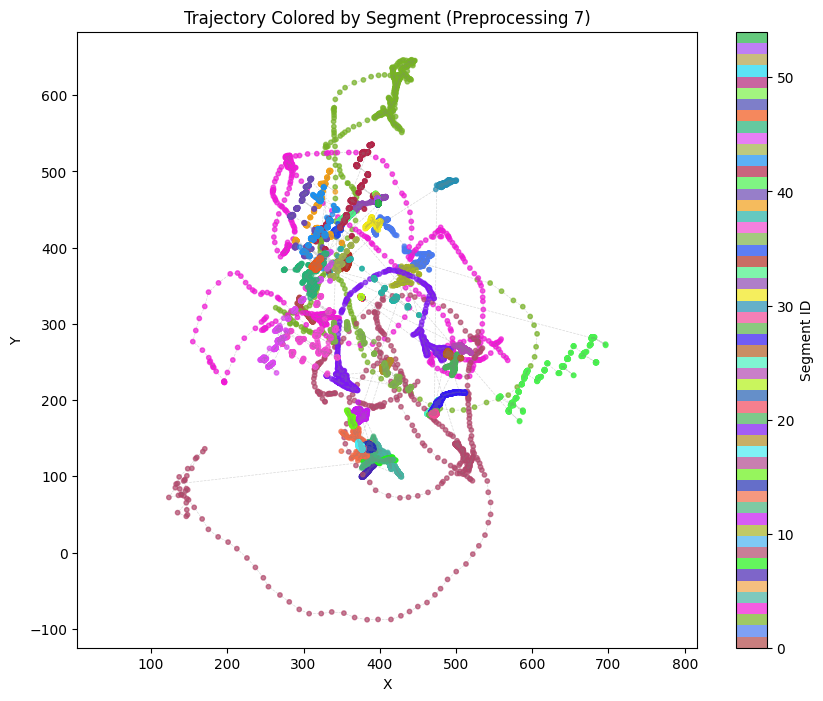

In [47]:
if df7 is not None and 'Segment' in df7.columns:
    import matplotlib.colors as mcolors
    import colorsys
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    num_segments = int(df7['Segment'].max()) + 1
    
    # Generate distinct colors using Golden Angle approximation
    # This ensures that consecutive segments have very different hues (jumps well)
    # We also vary saturation and value to increase the color palette variety
    colors = []
    for i in range(num_segments):
        hue = (i * 0.618033988749895) % 1.0
        sat = 0.6 + ((i % 4) * 0.1)  # Cycle saturation: 0.6, 0.7, 0.8, 0.9
        val = 0.7 + ((i % 2) * 0.25) # Cycle value: 0.7, 0.95
        rgb = colorsys.hsv_to_rgb(hue, sat, val)
        colors.append(rgb)
        
    custom_cmap = mcolors.ListedColormap(colors)
    
    # Plot trajectory colored by Segment
    sc = ax.scatter(df7['X'], df7['Y'], c=df7['Segment'], cmap=custom_cmap, s=10, alpha=0.7)
    
    # Add a light line to show the path
    ax.plot(df7['X'], df7['Y'], "--", color='gray', linewidth=0.5, alpha=0.3)
    
    ax.set_title("Trajectory Colored by Segment (Preprocessing 7)")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.axis('equal')
    
    plt.colorbar(sc, ax=ax, label='Segment ID')
    plt.show()
elif df7 is None:
    print("df7 is not loaded.")
else:
    print("Column 'Segment' not found in df7.")

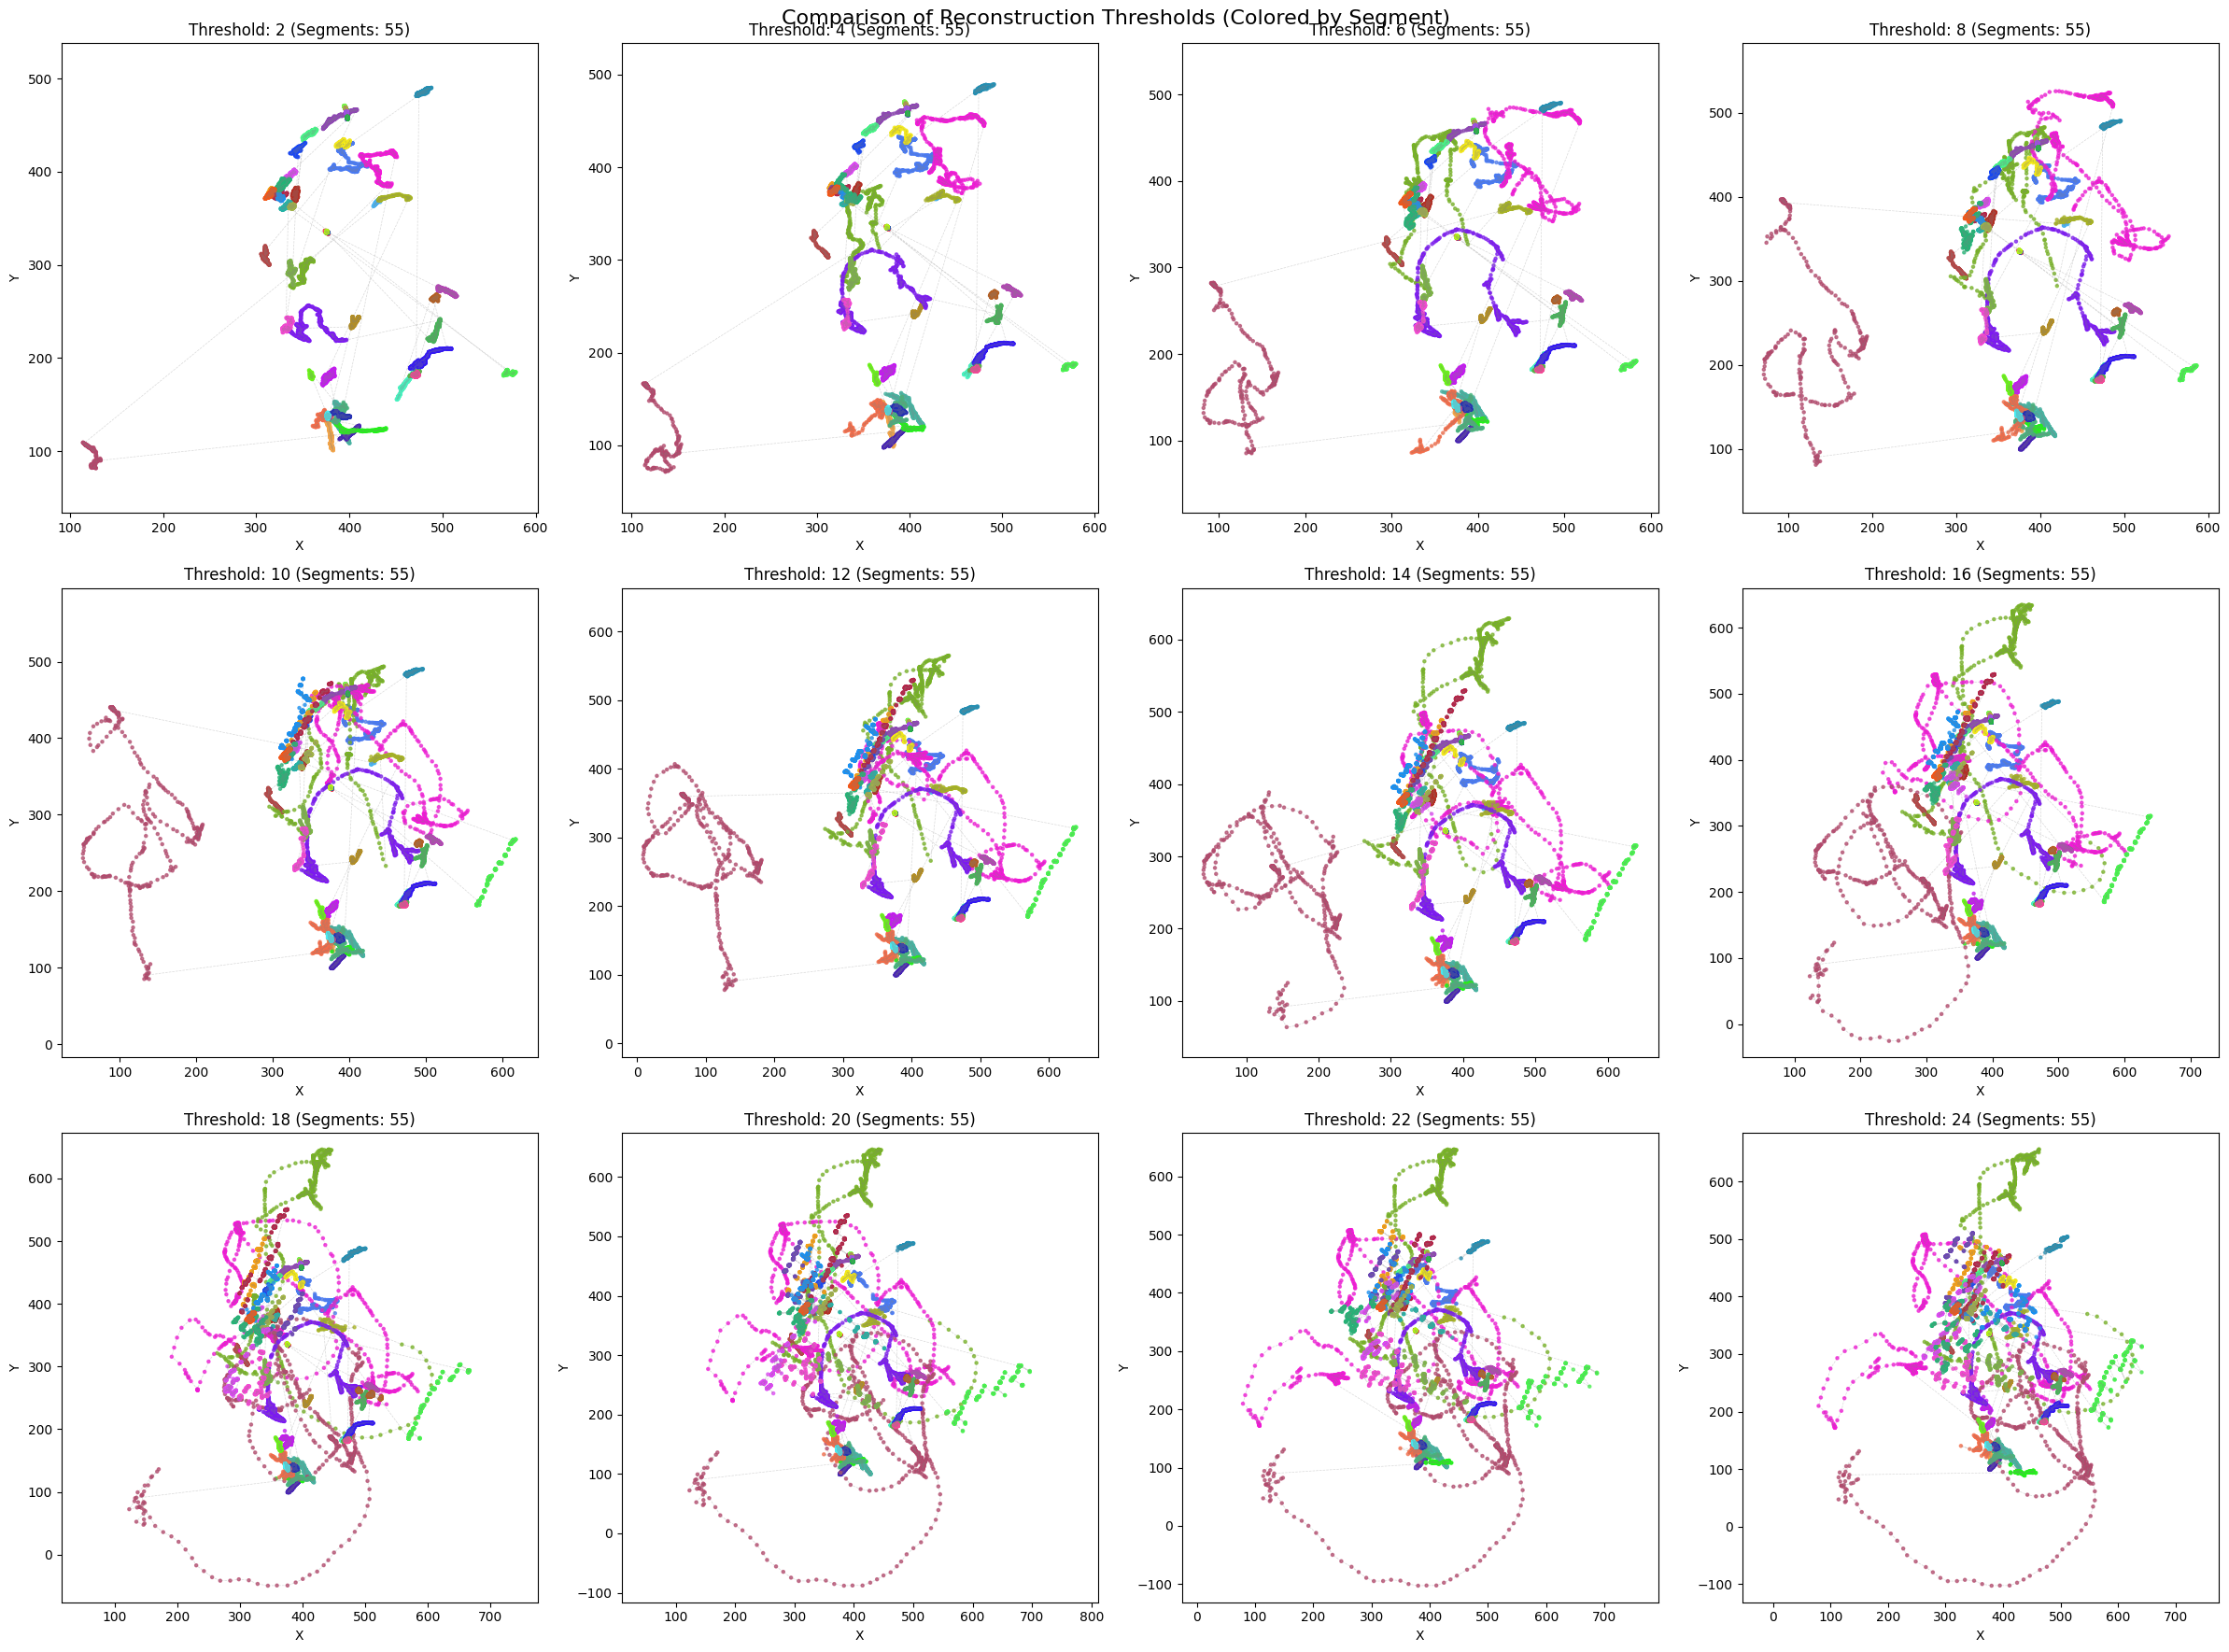

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
import pandas as pd
import numpy as np
import os

# Define thresholds
thresholds = list(range(2, 25, 2))

# Setup plot grid
num_plots = len(thresholds)
cols = 4
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(24, 6 * rows))
axes = axes.flatten()

# File info
filename = "20240827_piworm10_1.csv"
treatment_folder = "TERBINAFINE- (control)"

for i, threshold in enumerate(thresholds):
    ax = axes[i]
    # Note: Adjust path relative to the notebook location
    folder = f"../preprocessed_data_thresh_{threshold}"
    filepath = os.path.join(folder, treatment_folder, filename)
    
    if os.path.exists(filepath):
        try:
            df = pd.read_csv(filepath)
            
            if 'Segment' in df.columns and not df.empty:
                num_segments = int(df['Segment'].max()) + 1
                
                # Generate distinct colors using Golden Angle approximation
                colors = []
                for j in range(num_segments):
                    hue = (j * 0.618033988749895) % 1.0
                    sat = 0.6 + ((j % 4) * 0.1)
                    val = 0.7 + ((j % 2) * 0.25)
                    rgb = colorsys.hsv_to_rgb(hue, sat, val)
                    colors.append(rgb)
                custom_cmap = mcolors.ListedColormap(colors)
                
                sc = ax.scatter(df['X'], df['Y'], c=df['Segment'], cmap=custom_cmap, s=5, alpha=0.7)
                ax.plot(df['X'], df['Y'], "--", color='gray', linewidth=0.5, alpha=0.3)
                ax.set_title(f"Threshold: {threshold} (Segments: {num_segments})")
                ax.set_xlabel("X")
                ax.set_ylabel("Y")
                ax.axis('equal')
            else:
                ax.text(0.5, 0.5, "No Segment Data or Empty", ha='center')
        except Exception as e:
             ax.text(0.5, 0.5, f"Error loading:\n{e}", ha='center')
    else:
        ax.text(0.5, 0.5, f"File not found:\n{filepath}", ha='center')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Comparison of Reconstruction Thresholds (Colored by Segment)", fontsize=16)
plt.tight_layout()
plt.show()